# This notebook makes a pretty CGPS plot

In [1]:
import numpy as np
from PIL import Image

In [4]:
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [3]:
cgps = Image.open('../figs/CGPS_Continuum.png')
print(cgps.size)

(6981, 716)


In [5]:
def convert_degree(deg):
  degrees = np.trunc(deg).astype(int)
  minutes = np.abs(np.round(60*(degrees - deg))).astype(int)
  return [f"{d}°{m}'" for d, m in zip(degrees, minutes)]

NUM_B_TICKS = 3
NUM_L_TICKS = 9

bmin, ymin = -3.6, cgps.size[1]
bmax, ymax = 5.6, 0
lmin, xmin = 74.2, cgps.size[0]
lmax, xmax = 174.3, 0

b_ticks = np.linspace(ymin, ymax, NUM_B_TICKS)
l_ticks = np.linspace(xmin, xmax, NUM_L_TICKS)

b_labels = convert_degree(np.linspace(bmin, bmax, NUM_B_TICKS))
l_labels = convert_degree(np.linspace(lmin, lmax, NUM_L_TICKS))
print(b_labels)


["-3°36'", "0°60'", "5°36'"]


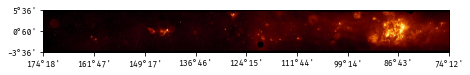

In [6]:
plt.figure(figsize=FULL_FIG(0.3))
plt.imshow(cgps)
plt.yticks(b_ticks, labels=b_labels)
plt.xticks(l_ticks, labels=l_labels)
plt.savefig('../figs/cgps_continuum.pdf', transparent=True, bbox_inches="tight", pad_inches=0)
plt.show()